# Modeling: 

## Lasso Regression (L1 Regularization)

![Modeling](https://user-images.githubusercontent.com/67468718/111879997-1bbd6a80-8966-11eb-92c1-01c38cbdbe4a.JPG)



## Contents<a id='Contents'></a>
 * [1. Introduction](#1_Introduction)
 * [2. Sourcing and Loading](#2_Sourcing_and_Loading)
    * [2.1 Import relevant libraries](#2.1_Import_relevant_libraries)
    * [2.2 Load the data](#2.2_Load_the_data)
 * [3. View and Visualize our dependent variable 'price'](#3._View_and_Visualize_our_dependent_variable_price)
    * [3.1 View the data](#3.1_View_the_data)
    * [3.2 Final Visualization of our dependent Variable 'price'](#3.2_Final_Visualization_of_our_dependent_variable_price)
 * [4. Features Selection: Define/Select Features](#4_Features_Selection:_Define/Select_Features)
 * [5. Train/Test Split](#5_Train/Test_Split)
 * [6. Scaling and Transformation: Standardization](#6_Scaling_and_Transformation:_Standardization)
 * [7. Modeling: Lasso Regression (L2 Regularization)](#7_Lasso_Regression_(L2_Regularization))
    * [7.1 Fitting Lasso Regression](#7.1_Fitting_Lasso_Regression)
    * [7.2 Lasso Regression: Coefficients (Before Regularization)](#7.2_Lasso_Regression:_Coefficients_(Before_Regularization))
    * [7.3 Lasso Regression: Residuals Visualization](#7.3_Lasso_Regression:_Residuals_Visualization)
    * [7.4 Lasso Regression Model Evaluation](#7.4_Lasso_Regression_Model_Evaluation)
    * [7.5 Features Selection](#7.5_Features_Selection)
       * [7.5.1 Keeping high important Features Only](#7.5.1_Keeping_high_important_Features_Only)
       * [7.5.2 Lasso Regression Model Evaluation with High Important Features](#7.5.2_Lasso_Regression_Model_Evaluation_with_High_Important_Features)    
       * [7.5.3 Features Selection Summary](#7.5.3_Features_Selection_Summary)    
    * [7.6 Regularization I: Lasso](#7.6_Regularization_I:_Lasso)
       * [7.6.1 Fitting Lasso Regression](#7.6.1_Fitting_Lasso_Regression)
       * [7.6.2 Lasso Regression: Coefficients (After Regularization)](#7.6_Lasso_Regression:_Coefficients_(After_Regularization))
       * [7.6.3 Lasso Regression Model Evaluation](#7.6.3_Lasso_Regression_Model_Evaluation)
 * [8. Lasso Regression Tuning Summary](#8_Lasso_Regression_Tuning_Summary)
 * [9. Lasso Regression Actual vs Prediction Visualization](#9_Lasso_Regression_Actual_vs_Prediction_Visualization)
 * [10. Models next step](#10_Models_next_step)

## 1. Introduction<a id='1_Introduction'></a>

Here comes the really fun step: modeling! For this step, we'll be:
 * Training multiple Regression algorithms.
 * Apply hyperparameters tuning where applicable to ensure every algorithm will result in best prediction possible.
 * Finally, evaluate these Models.

**Regression Models:**
 * Dummy Regression (Baseline Model)
 * Linear Regression
 * Ridge Regression (L2 Regularization)
 * Lasso Regression (L1 Regularization)
 * Decision Trees
 * Random Forests
 * GB
 * XGBoost
 * Light GBM
 * Artificial Neural networks (ANN).
 * Stacking
 
 
 **In This Notebook, We'll be using Lasso Regression (L1 Regularization)**



## 2. Sourcing and Loading<a id='2_Sourcing_and_Loading'></a> 

### 2.1 Import relevant libraries<a id='2.1_Import_relevant_libraries'></a> 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os 

plt.style.use('ggplot')

print('***Libraries are imported***')

***Libraries are imported***


### 2.2 Load the data<a id='2.2_Load_the_data'></a>

In [ ]:
# Check Current Directory:
os.getcwd()

In [5]:
# Changing the directory:
os.chdir(r"path/Feature_Engineering/datasets")

In [ ]:
#Confirm the directory:
os.getcwd()

In [ ]:
# List files/folders in the cd:
os.listdir()

In [8]:
df = pd.read_csv('pre_processing_df_main_two.csv')

## 3. View and Visualize our dependent variable 'price'<a id='3._View_and_Visualize_our_dependent_variable_price'></a>

### 3.1 View the data<a id='3.1_View_the_data'></a>

In [9]:
#Let's check the df shape:
structure = df.shape
print("Final DataFrame 'df' has Rows:", structure[0], "and Columns: ", structure[1])

Final DataFrame 'df' has Rows: 6002 and Columns:  29


In [10]:
#Let's check the df shape:
df.head()

,property_type,zipcode,beds,baths,sqft,price,lot_size,days_on_market,price_per_sqft,hoa_month,...,university_count,barts,malls,universities,bedBath,AvgRoomSize,cluster_label,median_price_sqft_cluster,gsRating,distance_miles
0,1,94568,3,4,1994,905000,0,80,454,388.0,...,0,1,0,0,12,284.857,205,441.5,8.714286,2.267857
1,0,94568,4,4,3083,1250000,3058,143,405,232.0,...,0,1,0,0,16,385.375,205,441.5,8.714286,2.250000
2,0,94568,4,4,3180,1290000,4477,123,406,232.0,...,0,1,0,0,16,397.500,205,441.5,8.714286,2.227857
3,0,94568,4,2,2069,1105000,2851,21,534,237.0,...,0,1,0,0,8,344.833,205,441.5,8.909091,2.097273
4,2,94568,3,2,1387,725000,5806,51,523,325.0,...,0,1,0,0,6,277.400,274,551.0,7.333333,2.338333


In [11]:
# Summary Statistics:
df.describe()['price'].round(2)

count       6002.00
mean      867244.88
std       380264.13
min       165000.00
25%       579898.75
50%       790000.00
75%      1100000.00
max      1955000.00
Name: price, dtype: float64

### 3.2 Final Visualization of our dependent Variable 'price'<a id='3.2_Final_Visualization_of_our_dependent_variable_price'></a>

C:\Users\aktha\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


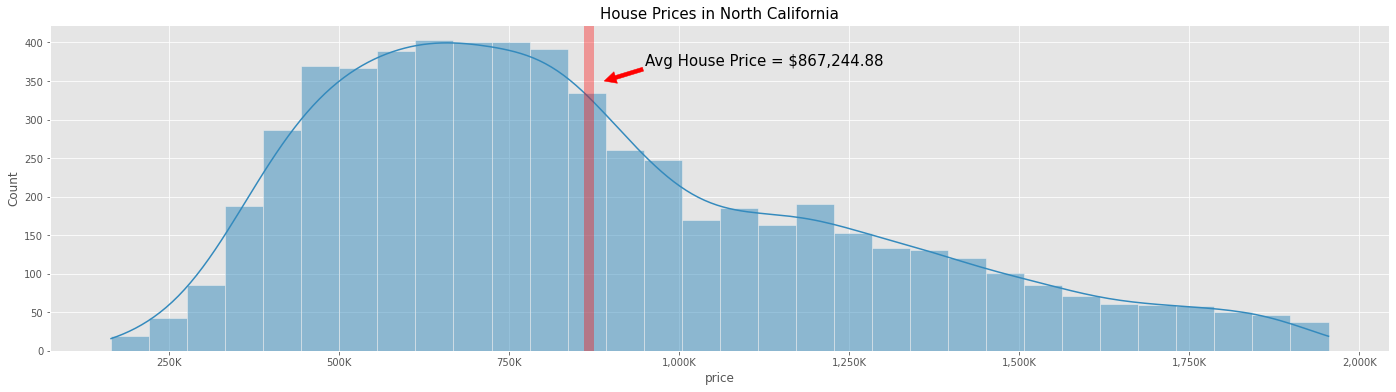

In [12]:
# Making a histogram of the price variable and adding average house sale:
f, ax = plt.subplots(figsize = (24,6))
ax = sns.histplot(x=df['price'], kde=True)
ax.axvline(df['price'].mean(), color='red', ls='-', alpha=0.35, lw=10)
plt.annotate('Avg House Price = $867,244.88', xy=(890000, 350), xytext=(950000, 370), arrowprops={'color':'red'}, fontsize=15)
ax.set_title('House Prices in North California', fontsize=15)
xlabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_xticks()/1000]
ax.set_xticklabels(xlabels)
plt.grid(True)

## 4. Features Selection: Define/Select Features<a id='4_Features_Selection:_Define/Select_Features'></a>


In [13]:
# let's check our final df columns:
df.columns

Index(['property_type', 'zipcode', 'beds', 'baths', 'sqft', 'price',
       'lot_size', 'days_on_market', 'price_per_sqft', 'hoa_month', 'lat',
       'long', 'property_age', 'school_rating', 'school_count',
       'median_income', 'hotness_score', 'supply_score', 'demand_score',
       'university_count', 'barts', 'malls', 'universities', 'bedBath',
       'AvgRoomSize', 'cluster_label', 'median_price_sqft_cluster', 'gsRating',
       'distance_miles'],
      dtype='object')

In [14]:
# Let's define/select our features:
features = ['property_type', 'zipcode', 'beds', 'baths', 'sqft', 
           'lot_size', 'days_on_market', 'hoa_month', 'lat',
           'long', 'property_age', 'school_rating', 'school_count',
           'median_income', 'hotness_score', 'supply_score', 'demand_score',
           'university_count', 'barts', 'malls', 'universities', 'bedBath',
           'AvgRoomSize', 'cluster_label', 'median_price_sqft_cluster', 'gsRating',
           'distance_miles']

# And, Now let's define X and y:
X = df[features]
y = df.price

## 5. Train/Test Split<a id='5_Train/Test_Split'></a>

Now, let's split our data (X) into training and testing splits, without letting a model learn anything about the test split.

let's have 75/25 Train/Test split

In [15]:
# Import train_test_split
from sklearn.model_selection import train_test_split


# Split into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=1981)

## 6. Scaling and Transformation: Standardization<a id='6_Scaling_and_Transformation:_Standardization'></a>

**Standardization** finds the mean of our data and centers the distribution around it, calculating the number of standard deviations away from the mean each point is. The number of standard deviations are then used as our new values. This centers the data around 0 but technically has no limit to the maximum and minimum values.



In [16]:
# Import StandardScaler:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler:
scaler = StandardScaler()

# Fit & transform  scaler to the data:
X_train = scaler.fit_transform(X_train.astype(np.float))
X_test = scaler.transform(X_test.astype(np.float))


## 7. Modeling: Lasso Regression (L1 Regularization)<a id='7_Lasso_Regression_(L1_Regularization)'></a>

There is another type of regularized regression called lasso regression. In which our loss function is the standard OLS loss function plus the absolute value of each coefficient multiplied by some constant alpha. The method of performing lasso regression in scikit-learn mirrors ridge regression.

### 7.1 Fitting Lasso Regression<a id='7.1_Fitting_Lasso_Regression'></a>


In [17]:
# Import necessary modules
from sklearn.linear_model import Lasso

# Create a ridge regressor: lasso
lasso = Lasso(random_state=1981) # alpha=1 (Default)

# Fit the regressor to the training data
lasso.fit(X_train, y_train)

# Evaluate the model: R-Squared coefficient
print("R^2 coefficient : {:.4f}".format(lasso.score(X_test, y_test) * 100), '%')

R^2 coefficient : 87.2689 %


C:\Users\aktha\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16515296838576.898, tolerance: 65519859695.15109
  positive)


In [18]:
# Predict on the test data: y_pred_ridge
y_pred_lasso = lasso.predict(X_test)

### 7.2 Lasso Regression: Coefficients (Before Regularization) <a id='7.2_Lasso_Regression:_Coefficients_(Before_Regularization)'></a>

In [19]:
print("***Lasso Regression - Coefficients***")
print("-------------------------------------")
print(pd.DataFrame(lasso.coef_.round(2), X.columns, columns=['coef']).sort_values(by='coef', ascending=False))

***Lasso Regression - Coefficients***
-------------------------------------
                                coef
median_price_sqft_cluster  111676.49
sqft                       105874.77
baths                      100627.05
beds                        75983.78
gsRating                    61434.77
lot_size                    53013.31
AvgRoomSize                 48209.40
universities                38364.54
school_rating               37023.94
malls                       20853.58
median_income               20101.31
school_count                16218.08
distance_miles              10681.19
zipcode                      6457.73
demand_score                 4856.62
cluster_label                -735.00
barts                       -3604.22
supply_score                -6004.93
property_age               -10471.60
days_on_market             -19180.99
hoa_month                  -24508.49
university_count           -28948.01
lat                        -34523.47
property_type              -34995.69

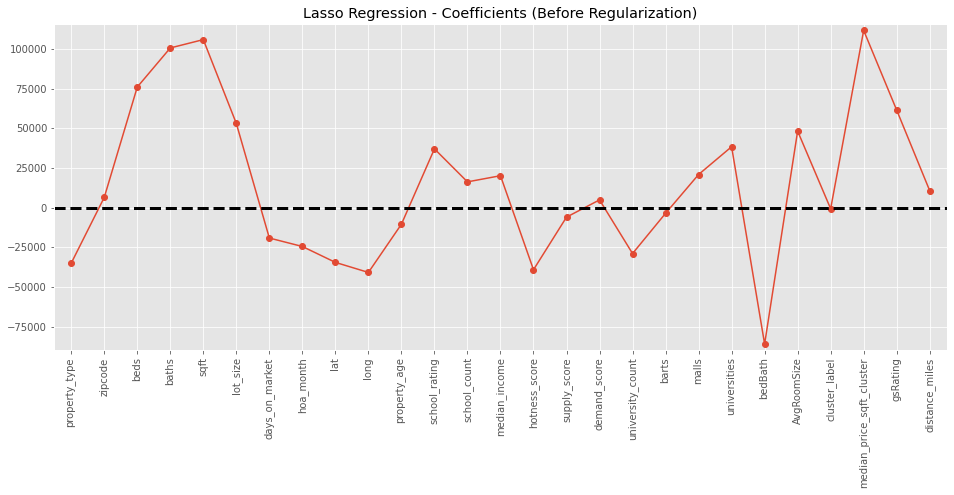

In [20]:
# Plot the coefficients
plt.subplots(figsize = (16,6))
plt.plot(range(len(X.columns)), lasso.coef_, marker='o')
plt.xticks(range(len(X.columns)), X.columns.values, rotation=90)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.title("Lasso Regression - Coefficients (Before Regularization)")
plt.margins(0.02)
plt.show()

Lasso Regression - Coefficients Summary:

 * As we can see above, Ridge Regression Coefficients are much smaller compared to Linear Regression!!
 * Again, 'university_count' and 'malls' are showing the least Coefficients (Least Important Features).
 * beds, baths, sqft, price_per_sqft and bedbath are the most important features.

### 7.3 Lasso Regression: Residuals Visualization<a id='7.3_Lasso_Regression:_Residuals_Visualization'></a>

C:\Users\aktha\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

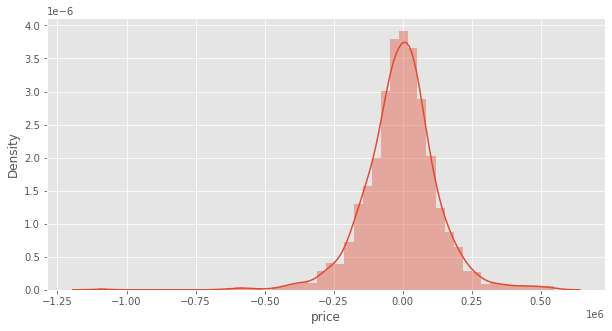

In [21]:
# visualizing residuals
fig = plt.figure(figsize=(10, 5))
residuals = (y_test-y_pred_lasso)
sns.distplot(residuals)

As we can see above by visualizing the residual we can see that is normally distributed which is a good indication that we're having a linear relationship with our dependent variable 'price'.

### 7.4 Lasso Regression Model Evaluation<a id='7.4_Lasso_Regression_Model_Evaluation'></a>

In [22]:
from sklearn import metrics

print("********Lasso Regression Model Evaluation********")
print("--------------------------------------------------")
print("R^2 Score: {:.2f}".format(metrics.r2_score(y_test, y_pred_lasso) * 100), '%')
print("--------------------------------------------------")
print("Adjusted R^2 Score: {:.4f}".format((1 - (1-metrics.r2_score(y_test, y_pred_lasso))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))*100), '%')
print("--------------------------------------------------")
print("MAE: {:.4f}".format(metrics.mean_absolute_error(y_test, y_pred_lasso)))
print("--------------------------------------------------")
print("RMSE:{:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso))))
print("--------------------------------------------------")
print("Variance Score:{:.2f}".format( metrics.explained_variance_score(y_test, y_pred_lasso) * 100), '%')
print("--------------------------------------------------")

********Lasso Regression Model Evaluation********
--------------------------------------------------
R^2 Score: 87.27 %
--------------------------------------------------
Adjusted R^2 Score: 87.0356 %
--------------------------------------------------
MAE: 96077.5947
--------------------------------------------------
RMSE:134267.8161
--------------------------------------------------
Variance Score:87.30 %
--------------------------------------------------


As we can see, the value of **root mean squared error (RMSE) is 134,267.8161**, which is slightly larger than 15% of the mean value of the Sales Price i.e.  $867,244.88.

### 7.5 Features Selection<a id='7.5_Features_Selection'></a>

**Dropping Features:**
based on above Features importance, let's keep only 'property_type',  'beds', 'baths', 'sqft', 'zipcode', 'lot_size', 'days_on_market', 'hoa_month', 'lat',
'long', 'property_age', 'gsRating','median_income' and 'university_count', 'malls','median_price_sqft_cluster'.

 
#### 7.5.1 Keeping high important Features Only<a id='7.5.1_Keeping_high_important_Features_Only'></a> 

In [23]:
# So Now, Let's re define/select our features and keep only high Coefficients:
features = ['property_type',  'beds', 'baths', 'sqft', 'zipcode',
            'lot_size', 'days_on_market', 'hoa_month', 'lat',
            'long', 'property_age', 'gsRating','median_income',
            'university_count', 'malls','median_price_sqft_cluster'] 

# And, Now let's define X and y:
X = df[features]
y = df.price

In [24]:
# Import train_test_split
from sklearn.model_selection import train_test_split


# Split into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=1981)

# Import StandardScaler:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler:
scaler = StandardScaler()

# Fit & transform  scaler to the data:
X_train = scaler.fit_transform(X_train.astype(np.float))
X_test = scaler.transform(X_test.astype(np.float))


#### 7.5.2 Lasso Regression Model Evaluation with High Important Features<a id='7.5.2_Lasso_Regression_Model_Evaluation_with_High_Important_Features'></a> 

In [25]:
# Import necessary modules
from sklearn.linear_model import Lasso

# Create a ridge regressor: lasso_1
lasso_1 = Lasso(random_state=1981) # alpha=1 (Default)

# Fit the regressor to the training data
lasso_1.fit(X_train, y_train)

# Evaluate the model: R-Squared coefficient
print("R^2 coefficient : {:.4f}".format(lasso_1.score(X_test, y_test) * 100), '%')

# Predict on the test data: y_pred_ridge
y_pred_lasso_1 = lasso_1.predict(X_test)


R^2 coefficient : 87.0595 %


In [26]:
print("********Tuned Lasso Regression Model Evaluation********")
print("-------------------------------------------------")
print("R^2 Score: {:.4f}".format(metrics.r2_score(y_test, y_pred_lasso_1) * 100), '%')
print("-------------------------------------------------------------")
print("Adjusted R^2 Score: {:.4f}".format((1 - (1-metrics.r2_score(y_test, y_pred_lasso_1))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))*100), '%')
print("-------------------------------------------------")
print("MAE: {:.4f}".format(metrics.mean_absolute_error(y_test, y_pred_lasso_1)))
print("-------------------------------------------------")
print("RMSE:{:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso_1))))
print("-------------------------------------------------")
print("Variance Score:{:.4f}".format( metrics.explained_variance_score(y_test, y_pred_lasso_1) * 100), '%')
print("-------------------------------------------------")

********Tuned Lasso Regression Model Evaluation********
-------------------------------------------------
R^2 Score: 87.0595 %
-------------------------------------------------------------
Adjusted R^2 Score: 86.9199 %
-------------------------------------------------
MAE: 96522.2991
-------------------------------------------------
RMSE:135367.8360
-------------------------------------------------
Variance Score:87.0805 %
-------------------------------------------------


#### 7.5.3 Features Selection Summary<a id='7.5.3_Features_Selection_Summary'></a>

Lasso regression performance summary with Features tuning:

|Features Selection| R^2 Score|Adjusted R^2 Score  |  MAE  | RMSE|Variance Score|
|:----------------------|:-------:|:-------:|:----:|:----:|:----:|
|Baseline (all features)|87.27 %|87.0356 %|96077.5947|134267.8161|87.30 %|
|Tuned(High Important Features)   |87.0595 %|86.9199 %|96522.2991|135367.8360|87.0805 %|


### 7.6 Regularization I: Lasso<a id='7.6_Regularization_I:_Lasso'></a>

In [27]:
# Import necessary modules
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

n_alphas = 400
alphas = np.logspace(-10, 1, n_alphas) #let's use linspace from NumPy to control the precise end value

params = [{'alpha': alphas }]            

# Create a lasso regressor: lasso
lasso = Lasso(random_state=1981)

#cross validation
folds = 5

# Setup the RandomizedSearchCV object: lasso_cv
#lasso_cv = RandomizedSearchCV(estimator = lasso, 
 #                              param_distributions = params, 
 #                              scoring= 'neg_mean_squared_error', 
 #                              n_iter = 500, cv = folds, n_jobs=-1,
 #                              return_train_score=True, verbose = 2)   

# Setup the GridSearchCV object: lasso_cv
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, n_jobs=1,
                        return_train_score=True,
                        verbose = 2)  

# Fit it to the training data
lasso_cv.fit(X_train, y_train) # We'll be using same training data where we dropped 2 features



Fitting 5 folds for each of 400 candidates, totalling 2000 fits
[CV] END ........................................alpha=1e-10; total time=   0.0s
[CV] END ........................................alpha=1e-10; total time=   0.0s
[CV] END ........................................alpha=1e-10; total time=   0.0s
[CV] END ........................................alpha=1e-10; total time=   0.0s
[CV] END ........................................alpha=1e-10; total time=   0.0s
[CV] END .......................alpha=1.0655379505623064e-10; total time=   0.0s
[CV] END .......................alpha=1.0655379505623064e-10; total time=   0.0s
[CV] END .......................alpha=1.0655379505623064e-10; total time=   0.0s
[CV] END .......................alpha=1.0655379505623064e-10; total time=   0.0s
[CV] END .......................alpha=1.0655379505623064e-10; total time=   0.0s
[CV] END .......................alpha=1.1353711240885201e-10; total time=   0.0s


C:\Users\aktha\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 597603238882.3203, tolerance: 52861674062.440186
  positive)


[CV] END .......................alpha=1.1353711240885201e-10; total time=   0.0s
[CV] END .......................alpha=1.1353711240885201e-10; total time=   0.0s
[CV] END .......................alpha=1.1353711240885201e-10; total time=   0.0s
[CV] END .......................alpha=1.1353711240885201e-10; total time=   0.0s
[CV] END .......................alpha=1.2097810206889038e-10; total time=   0.0s
[CV] END .......................alpha=1.2097810206889038e-10; total time=   0.0s
[CV] END .......................alpha=1.2097810206889038e-10; total time=   0.0s
[CV] END .......................alpha=1.2097810206889038e-10; total time=   0.0s


C:\Users\aktha\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1146664481616.5938, tolerance: 52861674062.440186
  positive)
C:\Users\aktha\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2884899308878.9375, tolerance: 53073111951.59278
  positive)
C:\Users\aktha\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 883854976262.375, tolerance: 52861674062.440186
  positive)


[CV] END .......................alpha=1.2097810206889038e-10; total time=   0.0s
[CV] END .......................alpha=1.2890675894140244e-10; total time=   0.0s
[CV] END .......................alpha=1.2890675894140244e-10; total time=   0.0s
[CV] END .......................alpha=1.2890675894140244e-10; total time=   0.0s
[CV] END .......................alpha=1.2890675894140244e-10; total time=   0.0s
[CV] END .......................alpha=1.2890675894140244e-10; total time=   0.0s
[CV] END .......................alpha=1.3735504373605123e-10; total time=   0.0s
[CV] END .......................alpha=1.3735504373605123e-10; total time=   0.0s
[CV] END .......................alpha=1.3735504373605123e-10; total time=   0.0s
[CV] END .......................alpha=1.3735504373605123e-10; total time=   0.0s
[CV] END .......................alpha=1.3735504373605123e-10; total time=   0.0s
[CV] END .......................alpha=1.4635701180190798e-10; total time=   0.0s
[CV] END ...................

C:\Users\aktha\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 731814553662.8984, tolerance: 52861674062.440186
  positive)
C:\Users\aktha\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1383957329597.3672, tolerance: 53073111951.59278
  positive)


[CV] END .......................alpha=1.6616952500776907e-10; total time=   0.0s
[CV] END .......................alpha=1.6616952500776907e-10; total time=   0.0s
[CV] END .......................alpha=1.6616952500776907e-10; total time=   0.0s
[CV] END .......................alpha=1.6616952500776907e-10; total time=   0.0s
[CV] END .......................alpha=1.6616952500776907e-10; total time=   0.0s
[CV] END .......................alpha=1.7705993512269017e-10; total time=   0.0s
[CV] END .......................alpha=1.7705993512269017e-10; total time=   0.0s
[CV] END .......................alpha=1.7705993512269017e-10; total time=   0.0s
[CV] END .......................alpha=1.7705993512269017e-10; total time=   0.0s
[CV] END .......................alpha=1.7705993512269017e-10; total time=   0.0s
[CV] END .......................alpha=1.8866408039732543e-10; total time=   0.0s
[CV] END .......................alpha=1.8866408039732543e-10; total time=   0.0s
[CV] END ...................

C:\Users\aktha\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1238205420590.2656, tolerance: 52861674062.440186
  positive)


[CV] END .......................alpha=1.8866408039732543e-10; total time=   0.0s
[CV] END .......................alpha=2.0102873757128835e-10; total time=   0.0s
[CV] END .......................alpha=2.0102873757128835e-10; total time=   0.0s
[CV] END .......................alpha=2.0102873757128835e-10; total time=   0.0s
[CV] END .......................alpha=2.0102873757128835e-10; total time=   0.0s
[CV] END .......................alpha=2.0102873757128835e-10; total time=   0.0s
[CV] END ........................alpha=2.142037490358383e-10; total time=   0.0s
[CV] END ........................alpha=2.142037490358383e-10; total time=   0.0s
[CV] END ........................alpha=2.142037490358383e-10; total time=   0.0s
[CV] END ........................alpha=2.142037490358383e-10; total time=   0.0s
[CV] END ........................alpha=2.142037490358383e-10; total time=   0.0s
[CV] END .......................alpha=2.2824222375040978e-10; total time=   0.0s
[CV] END ...................

C:\Users\aktha\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 771643787231.1641, tolerance: 53073111951.59278
  positive)


[CV] END .......................alpha=2.2824222375040978e-10; total time=   0.0s
[CV] END .......................alpha=2.2824222375040978e-10; total time=   0.0s
[CV] END .......................alpha=2.2824222375040978e-10; total time=   0.0s
[CV] END .........................alpha=2.43200751326795e-10; total time=   0.0s
[CV] END .........................alpha=2.43200751326795e-10; total time=   0.0s
[CV] END .........................alpha=2.43200751326795e-10; total time=   0.0s
[CV] END .........................alpha=2.43200751326795e-10; total time=   0.0s
[CV] END .........................alpha=2.43200751326795e-10; total time=   0.0s
[CV] END .......................alpha=2.5913963014396624e-10; total time=   0.0s
[CV] END .......................alpha=2.5913963014396624e-10; total time=   0.0s
[CV] END .......................alpha=2.5913963014396624e-10; total time=   0.0s
[CV] END .......................alpha=2.5913963014396624e-10; total time=   0.0s
[CV] END ...................

C:\Users\aktha\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 407328925767.1953, tolerance: 53073111951.59278
  positive)


[CV] END ........................alpha=3.559413523216862e-10; total time=   0.0s
[CV] END ........................alpha=3.792690190732254e-10; total time=   0.0s
[CV] END ........................alpha=3.792690190732254e-10; total time=   0.0s
[CV] END ........................alpha=3.792690190732254e-10; total time=   0.0s
[CV] END ........................alpha=3.792690190732254e-10; total time=   0.0s
[CV] END ........................alpha=3.792690190732254e-10; total time=   0.0s
[CV] END .......................alpha=4.0412553329506086e-10; total time=   0.0s
[CV] END .......................alpha=4.0412553329506086e-10; total time=   0.0s
[CV] END .......................alpha=4.0412553329506086e-10; total time=   0.0s
[CV] END .......................alpha=4.0412553329506086e-10; total time=   0.0s
[CV] END .......................alpha=4.0412553329506086e-10; total time=   0.0s
[CV] END ........................alpha=4.306110925171165e-10; total time=   0.0s
[CV] END ...................

[CV] END .......................alpha=1.6331744666101668e-09; total time=   0.0s
[CV] END .......................alpha=1.6331744666101668e-09; total time=   0.0s
[CV] END .......................alpha=1.6331744666101668e-09; total time=   0.0s
[CV] END .......................alpha=1.6331744666101668e-09; total time=   0.0s
[CV] END ........................alpha=1.740209374062485e-09; total time=   0.0s
[CV] END ........................alpha=1.740209374062485e-09; total time=   0.0s
[CV] END ........................alpha=1.740209374062485e-09; total time=   0.0s
[CV] END ........................alpha=1.740209374062485e-09; total time=   0.0s
[CV] END ........................alpha=1.740209374062485e-09; total time=   0.0s
[CV] END .......................alpha=1.8542591299878543e-09; total time=   0.0s
[CV] END .......................alpha=1.8542591299878543e-09; total time=   0.0s
[CV] END .......................alpha=1.8542591299878543e-09; total time=   0.0s
[CV] END ...................

[CV] END ........................alpha=5.813143282224713e-09; total time=   0.0s
[CV] END .........................alpha=6.19412477926676e-09; total time=   0.0s
[CV] END .........................alpha=6.19412477926676e-09; total time=   0.0s
[CV] END .........................alpha=6.19412477926676e-09; total time=   0.0s
[CV] END .........................alpha=6.19412477926676e-09; total time=   0.0s
[CV] END .........................alpha=6.19412477926676e-09; total time=   0.0s
[CV] END ........................alpha=6.600075022827102e-09; total time=   0.0s
[CV] END ........................alpha=6.600075022827102e-09; total time=   0.0s
[CV] END ........................alpha=6.600075022827102e-09; total time=   0.0s
[CV] END ........................alpha=6.600075022827102e-09; total time=   0.0s
[CV] END ........................alpha=6.600075022827102e-09; total time=   0.0s
[CV] END ........................alpha=7.032630413380658e-09; total time=   0.0s
[CV] END ...................

[CV] END ........................alpha=2.349239629049658e-08; total time=   0.0s
[CV] END ........................alpha=2.349239629049658e-08; total time=   0.0s
[CV] END ........................alpha=2.349239629049658e-08; total time=   0.0s
[CV] END .......................alpha=2.5032039797173254e-08; total time=   0.0s
[CV] END .......................alpha=2.5032039797173254e-08; total time=   0.0s
[CV] END .......................alpha=2.5032039797173254e-08; total time=   0.0s
[CV] END .......................alpha=2.5032039797173254e-08; total time=   0.0s
[CV] END .......................alpha=2.5032039797173254e-08; total time=   0.0s
[CV] END .......................alpha=2.6672588383874026e-08; total time=   0.0s
[CV] END .......................alpha=2.6672588383874026e-08; total time=   0.0s
[CV] END .......................alpha=2.6672588383874026e-08; total time=   0.0s
[CV] END .......................alpha=2.6672588383874026e-08; total time=   0.0s
[CV] END ...................

[CV] END .........................alpha=9.49387717927582e-08; total time=   0.0s
[CV] END .........................alpha=9.49387717927582e-08; total time=   0.0s
[CV] END .........................alpha=9.49387717927582e-08; total time=   0.0s
[CV] END .......................alpha=1.0116086432495807e-07; total time=   0.0s
[CV] END .......................alpha=1.0116086432495807e-07; total time=   0.0s
[CV] END .......................alpha=1.0116086432495807e-07; total time=   0.0s
[CV] END .......................alpha=1.0116086432495807e-07; total time=   0.0s
[CV] END .......................alpha=1.0116086432495807e-07; total time=   0.0s
[CV] END .......................alpha=1.0779074004992736e-07; total time=   0.0s
[CV] END .......................alpha=1.0779074004992736e-07; total time=   0.0s
[CV] END .......................alpha=1.0779074004992736e-07; total time=   0.0s
[CV] END .......................alpha=1.0779074004992736e-07; total time=   0.0s
[CV] END ...................

[CV] END .......................alpha=4.0881688243912893e-07; total time=   0.0s
[CV] END .......................alpha=4.0881688243912893e-07; total time=   0.0s
[CV] END .......................alpha=4.0881688243912893e-07; total time=   0.0s
[CV] END .......................alpha=4.0881688243912893e-07; total time=   0.0s
[CV] END ........................alpha=4.356099030694608e-07; total time=   0.0s
[CV] END ........................alpha=4.356099030694608e-07; total time=   0.0s
[CV] END ........................alpha=4.356099030694608e-07; total time=   0.0s
[CV] END ........................alpha=4.356099030694608e-07; total time=   0.0s
[CV] END ........................alpha=4.356099030694608e-07; total time=   0.0s
[CV] END .......................alpha=4.6415888336127725e-07; total time=   0.0s
[CV] END .......................alpha=4.6415888336127725e-07; total time=   0.0s
[CV] END .......................alpha=4.6415888336127725e-07; total time=   0.0s
[CV] END ...................

[CV] END .......................alpha=1.7604108438655526e-06; total time=   0.0s
[CV] END .......................alpha=1.7604108438655526e-06; total time=   0.0s
[CV] END .......................alpha=1.7604108438655526e-06; total time=   0.0s
[CV] END .......................alpha=1.8757845627201612e-06; total time=   0.0s
[CV] END .......................alpha=1.8757845627201612e-06; total time=   0.0s
[CV] END .......................alpha=1.8757845627201612e-06; total time=   0.0s
[CV] END .......................alpha=1.8757845627201612e-06; total time=   0.0s
[CV] END .......................alpha=1.8757845627201612e-06; total time=   0.0s
[CV] END .......................alpha=1.9987196386572483e-06; total time=   0.0s
[CV] END .......................alpha=1.9987196386572483e-06; total time=   0.0s
[CV] END .......................alpha=1.9987196386572483e-06; total time=   0.0s
[CV] END .......................alpha=1.9987196386572483e-06; total time=   0.0s
[CV] END ...................

[CV] END ........................alpha=7.580524367559262e-06; total time=   0.0s
[CV] END ........................alpha=7.580524367559262e-06; total time=   0.0s
[CV] END ........................alpha=7.580524367559262e-06; total time=   0.0s
[CV] END ........................alpha=7.580524367559262e-06; total time=   0.0s
[CV] END ........................alpha=7.580524367559262e-06; total time=   0.0s
[CV] END ........................alpha=8.077336398796703e-06; total time=   0.0s
[CV] END ........................alpha=8.077336398796703e-06; total time=   0.0s
[CV] END ........................alpha=8.077336398796703e-06; total time=   0.0s
[CV] END ........................alpha=8.077336398796703e-06; total time=   0.0s
[CV] END ........................alpha=8.077336398796703e-06; total time=   0.0s
[CV] END ........................alpha=8.606708472376158e-06; total time=   0.0s
[CV] END ........................alpha=8.606708472376158e-06; total time=   0.0s
[CV] END ...................

[CV] END ........................alpha=3.478190651314126e-05; total time=   0.0s
[CV] END ........................alpha=3.478190651314126e-05; total time=   0.0s
[CV] END ........................alpha=3.478190651314126e-05; total time=   0.0s
[CV] END ........................alpha=3.478190651314126e-05; total time=   0.0s
[CV] END ........................alpha=3.478190651314126e-05; total time=   0.0s
[CV] END ........................alpha=3.706144138266228e-05; total time=   0.0s
[CV] END ........................alpha=3.706144138266228e-05; total time=   0.0s
[CV] END ........................alpha=3.706144138266228e-05; total time=   0.0s
[CV] END ........................alpha=3.706144138266228e-05; total time=   0.0s
[CV] END ........................alpha=3.706144138266228e-05; total time=   0.0s
[CV] END ........................alpha=3.949037229576702e-05; total time=   0.0s
[CV] END ........................alpha=3.949037229576702e-05; total time=   0.0s
[CV] END ...................

[CV] END .......................alpha=0.00017004992358187905; total time=   0.0s
[CV] END .......................alpha=0.00017004992358187905; total time=   0.0s
[CV] END .......................alpha=0.00018119464706671222; total time=   0.0s
[CV] END .......................alpha=0.00018119464706671222; total time=   0.0s
[CV] END .......................alpha=0.00018119464706671222; total time=   0.0s
[CV] END .......................alpha=0.00018119464706671222; total time=   0.0s
[CV] END .......................alpha=0.00018119464706671222; total time=   0.0s
[CV] END .......................alpha=0.00019306977288832496; total time=   0.0s
[CV] END .......................alpha=0.00019306977288832496; total time=   0.0s
[CV] END .......................alpha=0.00019306977288832496; total time=   0.0s
[CV] END .......................alpha=0.00019306977288832496; total time=   0.0s
[CV] END .......................alpha=0.00019306977288832496; total time=   0.0s
[CV] END ...................

[CV] END .........................alpha=0.000644946677103762; total time=   0.0s
[CV] END .........................alpha=0.000644946677103762; total time=   0.0s
[CV] END .........................alpha=0.000644946677103762; total time=   0.0s
[CV] END .........................alpha=0.000644946677103762; total time=   0.0s
[CV] END .........................alpha=0.000644946677103762; total time=   0.0s
[CV] END ........................alpha=0.0006872151605431107; total time=   0.0s
[CV] END ........................alpha=0.0006872151605431107; total time=   0.0s
[CV] END ........................alpha=0.0006872151605431107; total time=   0.0s
[CV] END ........................alpha=0.0006872151605431107; total time=   0.0s
[CV] END ........................alpha=0.0006872151605431107; total time=   0.0s
[CV] END ........................alpha=0.0007322538337604526; total time=   0.0s
[CV] END ........................alpha=0.0007322538337604526; total time=   0.0s
[CV] END ...................

[CV] END ........................alpha=0.0026063941983143473; total time=   0.0s
[CV] END ........................alpha=0.0026063941983143473; total time=   0.0s
[CV] END ........................alpha=0.0026063941983143473; total time=   0.0s
[CV] END ........................alpha=0.0026063941983143473; total time=   0.0s
[CV] END .........................alpha=0.002777211932429355; total time=   0.0s
[CV] END .........................alpha=0.002777211932429355; total time=   0.0s
[CV] END .........................alpha=0.002777211932429355; total time=   0.0s
[CV] END .........................alpha=0.002777211932429355; total time=   0.0s
[CV] END .........................alpha=0.002777211932429355; total time=   0.0s
[CV] END ........................alpha=0.0029592247107579515; total time=   0.0s
[CV] END ........................alpha=0.0029592247107579515; total time=   0.0s
[CV] END ........................alpha=0.0029592247107579515; total time=   0.0s
[CV] END ...................

[CV] END ..........................alpha=0.00988524570912826; total time=   0.0s
[CV] END .........................alpha=0.010533104453709382; total time=   0.0s
[CV] END .........................alpha=0.010533104453709382; total time=   0.0s
[CV] END .........................alpha=0.010533104453709382; total time=   0.0s
[CV] END .........................alpha=0.010533104453709382; total time=   0.0s
[CV] END .........................alpha=0.010533104453709382; total time=   0.0s
[CV] END .........................alpha=0.011223422532664151; total time=   0.0s
[CV] END .........................alpha=0.011223422532664151; total time=   0.0s
[CV] END .........................alpha=0.011223422532664151; total time=   0.0s
[CV] END .........................alpha=0.011223422532664151; total time=   0.0s
[CV] END .........................alpha=0.011223422532664151; total time=   0.0s
[CV] END .........................alpha=0.011958982643749769; total time=   0.0s
[CV] END ...................

[CV] END .........................alpha=0.058467872769375775; total time=   0.0s
[CV] END ..........................alpha=0.06229973732441835; total time=   0.0s
[CV] END ..........................alpha=0.06229973732441835; total time=   0.0s
[CV] END ..........................alpha=0.06229973732441835; total time=   0.0s
[CV] END ..........................alpha=0.06229973732441835; total time=   0.0s
[CV] END ..........................alpha=0.06229973732441835; total time=   0.0s
[CV] END ..........................alpha=0.06638273442923075; total time=   0.0s
[CV] END ..........................alpha=0.06638273442923075; total time=   0.0s
[CV] END ..........................alpha=0.06638273442923075; total time=   0.0s
[CV] END ..........................alpha=0.06638273442923075; total time=   0.0s
[CV] END ..........................alpha=0.06638273442923075; total time=   0.0s
[CV] END ..........................alpha=0.07073332279644438; total time=   0.0s
[CV] END ...................

[CV] END ..........................alpha=0.28585141796844654; total time=   0.0s
[CV] END ..........................alpha=0.28585141796844654; total time=   0.0s
[CV] END ...........................alpha=0.3045855340674278; total time=   0.0s
[CV] END ...........................alpha=0.3045855340674278; total time=   0.0s
[CV] END ...........................alpha=0.3045855340674278; total time=   0.0s
[CV] END ...........................alpha=0.3045855340674278; total time=   0.0s
[CV] END ...........................alpha=0.3045855340674278; total time=   0.0s
[CV] END ..........................alpha=0.32454744574113253; total time=   0.0s
[CV] END ..........................alpha=0.32454744574113253; total time=   0.0s
[CV] END ..........................alpha=0.32454744574113253; total time=   0.0s
[CV] END ..........................alpha=0.32454744574113253; total time=   0.0s
[CV] END ..........................alpha=0.32454744574113253; total time=   0.0s
[CV] END ...................

[CV] END ...........................alpha=1.4891290324394058; total time=   0.0s
[CV] END ...........................alpha=1.4891290324394058; total time=   0.0s
[CV] END ...........................alpha=1.5867234973483146; total time=   0.0s
[CV] END ...........................alpha=1.5867234973483146; total time=   0.0s
[CV] END ...........................alpha=1.5867234973483146; total time=   0.0s
[CV] END ...........................alpha=1.5867234973483146; total time=   0.0s
[CV] END ...........................alpha=1.5867234973483146; total time=   0.0s
[CV] END ...........................alpha=1.6907141034735782; total time=   0.0s
[CV] END ...........................alpha=1.6907141034735782; total time=   0.0s
[CV] END ...........................alpha=1.6907141034735782; total time=   0.0s
[CV] END ...........................alpha=1.6907141034735782; total time=   0.0s
[CV] END ...........................alpha=1.6907141034735782; total time=   0.0s
[CV] END ...................

[CV] END ............................alpha=8.265958738801796; total time=   0.0s
[CV] END ............................alpha=8.265958738801796; total time=   0.0s
[CV] END ............................alpha=8.265958738801796; total time=   0.0s
[CV] END ............................alpha=8.265958738801796; total time=   0.0s
[CV] END ............................alpha=8.265958738801796; total time=   0.0s
[CV] END ............................alpha=8.807692733975452; total time=   0.0s
[CV] END ............................alpha=8.807692733975452; total time=   0.0s
[CV] END ............................alpha=8.807692733975452; total time=   0.0s
[CV] END ............................alpha=8.807692733975452; total time=   0.0s
[CV] END ............................alpha=8.807692733975452; total time=   0.0s
[CV] END .............................alpha=9.38493086494272; total time=   0.0s
[CV] END .............................alpha=9.38493086494272; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=5, estimator=Lasso(random_state=1981), n_jobs=1,
             param_grid=[{'alpha': array([1.00000000e-10, 1.06553795e-10, 1.13537112e-10, 1.20978102e-10,
       1.28906759e-10, 1.37355044e-10, 1.46357012e-10, 1.55948950e-10,
       1.66169525e-10, 1.77059935e-10, 1.88664080e-10, 2.01028738e-10,
       2.14203749e-10, 2.28242224e-10, 2.43200751e-10, 2.59139630e-10,
       2.76123110e-10, 2.942...
       2.99357729e+00, 3.18977022e+00, 3.39882122e+00, 3.62157300e+00,
       3.85892347e+00, 4.11182940e+00, 4.38131027e+00, 4.66845237e+00,
       4.97441317e+00, 5.30042602e+00, 5.64780507e+00, 6.01795064e+00,
       6.41235480e+00, 6.83260739e+00, 7.28040247e+00, 7.75754513e+00,
       8.26595874e+00, 8.80769273e+00, 9.38493086e+00, 1.00000000e+01])}],
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=2)

In [28]:
#checking the value of optimum number of parameters
print("Tuned Lasso Regression Parameters: {}".format(lasso_cv.best_params_))
print("Lasso Regression - Best neg_mean_absolute_error is {:.4f}".format(lasso_cv.best_score_))

Tuned Lasso Regression Parameters: {'alpha': 10.0}
Lasso Regression - Best neg_mean_absolute_error is -100730.0236


In [29]:
cv_results = pd.DataFrame(lasso_cv.cv_results_)
cv_results.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
mean_fit_time,400.0,0.01,0.00,0.00,0.00,0.01,0.01,0.03
std_fit_time,400.0,0.00,0.00,0.00,0.00,0.01,0.01,0.01
mean_score_time,400.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
std_score_time,400.0,0.00,0.00,0.00,0.00,0.00,0.00,0.01
split0_test_score,400.0,-98220.15,0.12,-98220.19,-98220.19,-98220.19,-98220.19,-98219.34
split1_test_score,400.0,-111290.25,0.40,-111290.37,-111290.37,-111290.37,-111290.36,-111287.46
split2_test_score,400.0,-97982.84,0.34,-97982.94,-97982.94,-97982.94,-97982.94,-97980.50
split3_test_score,400.0,-99694.25,0.35,-99696.68,-99694.15,-99694.15,-99694.15,-99694.15
split4_test_score,400.0,-96466.45,0.04,-96466.46,-96466.46,-96466.46,-96466.46,-96466.14
mean_test_score,400.0,-100730.79,0.11,-100730.82,-100730.82,-100730.82,-100730.82,-100730.02


#### 7.6.1 Fitting Lasso Regression<a id='7.6.1_Fitting_Lasso_Regression'></a>

In [30]:
#(Best RandomizedSearchCV)
alpha = 10 

# Create a ridge regressor: lasso_a
lasso_a = Lasso(alpha=alpha, random_state=1981)

# Fit the regressor to the training data
lasso_a.fit(X_train, y_train)

# Evaluate the model: R-Squared coefficient
print("R^2 coefficient Tuned_Alpha : {:.4f}".format(lasso_a.score(X_test, y_test) * 100), '%')


R^2 coefficient Tuned_Alpha : 87.0595 %


In [31]:
# Predict on the test data: y_pred_lasso_a
y_pred_lasso_a = lasso_a.predict(X_test)

#### 7.6.2 Lasso Regression: Coefficients (After Regularization) <a id='7.6.2_Lasso_Regression:_Coefficients_(After_Regularization)'></a>

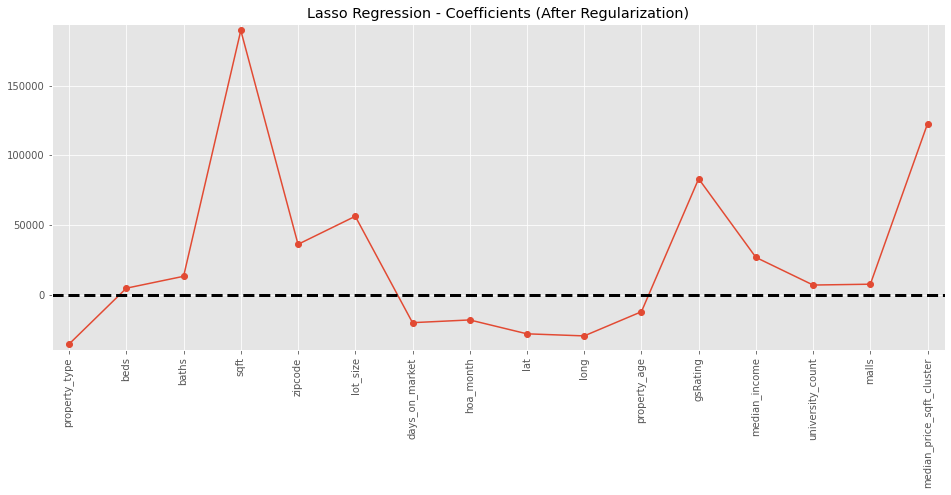

In [32]:
# Plot the coefficients
plt.subplots(figsize = (16,6))
plt.plot(range(len(X.columns)), lasso_a.coef_, marker='o')
plt.xticks(range(len(X.columns)), X.columns.values, rotation=90)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.title("Lasso Regression - Coefficients (After Regularization)")
plt.margins(0.02)
plt.show()

Alright, As we can see above, No Changes in Lasso Regression before or after Regularization (oppositie of what we saw in Ridge Regression).

#### 7.6.3 Lasso Regression Model Evaluation<a id='7.6.3_Lasso_Regression_Model_Evaluation'></a>

In [33]:
print("********Tuned_Alpha Lasso Regression Model Evaluation********")
print("-------------------------------------------------")
print("R^2 Score: {:.4f}".format(metrics.r2_score(y_test, y_pred_lasso_a) * 100), '%')
print("-------------------------------------------------------------")
print("Adjusted R^2 Score: {:.4f}".format((1 - (1-metrics.r2_score(y_test, y_pred_lasso_a))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))*100), '%')
print("-------------------------------------------------")
print("MAE: {:.4f}".format(metrics.mean_absolute_error(y_test, y_pred_lasso_a)))
print("-------------------------------------------------")
print("RMSE:{:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso_a))))
print("-------------------------------------------------")
print("Variance Score:{:.4f}".format( metrics.explained_variance_score(y_test, y_pred_lasso_a) * 100), '%')
print("-------------------------------------------------")

********Tuned_Alpha Lasso Regression Model Evaluation********
-------------------------------------------------
R^2 Score: 87.0595 %
-------------------------------------------------------------
Adjusted R^2 Score: 86.9200 %
-------------------------------------------------
MAE: 96520.8254
-------------------------------------------------
RMSE:135367.3967
-------------------------------------------------
Variance Score:87.0806 %
-------------------------------------------------


## 8. Lasso Regression Tuning Summary<a id='8_Lasso_Regression_Tuning_Summary'></a>

Lasso  Regression Model Tunning Summary:
 * Keeping the high important features.
 * Using Regularization to determine best Alpha=10.
 * Variance Score has degraded from 87.30 % (Lasso - baseline) to 87.0806 %

|Features Selection| R^2 Score|Adjusted R^2 Score  |  MAE  | RMSE|Variance Score|
|:----------------------|:-------:|:-------:|:----:|:----:|:----:|
|Baseline (all features)|87.27 %|87.0356 %|96077.5947|134267.8161|87.30 %|
|Tuned(High Important Features)   |87.0595 %|86.9199 %|96522.2991|135367.8360|87.0805 %|
|Tuned(High Important Features) + Regularization {'alpha': 10'}   |87.0595 %|86.9200 %|96520.8254|135367.3967|87.0806 %|

## 9. Lasso Regression Actual vs Prediction Visualization<a id='9_Lasso_Regression_Actual_vs_Prediction_Visualization'></a>

Text(0, 0.5, 'Prediction')

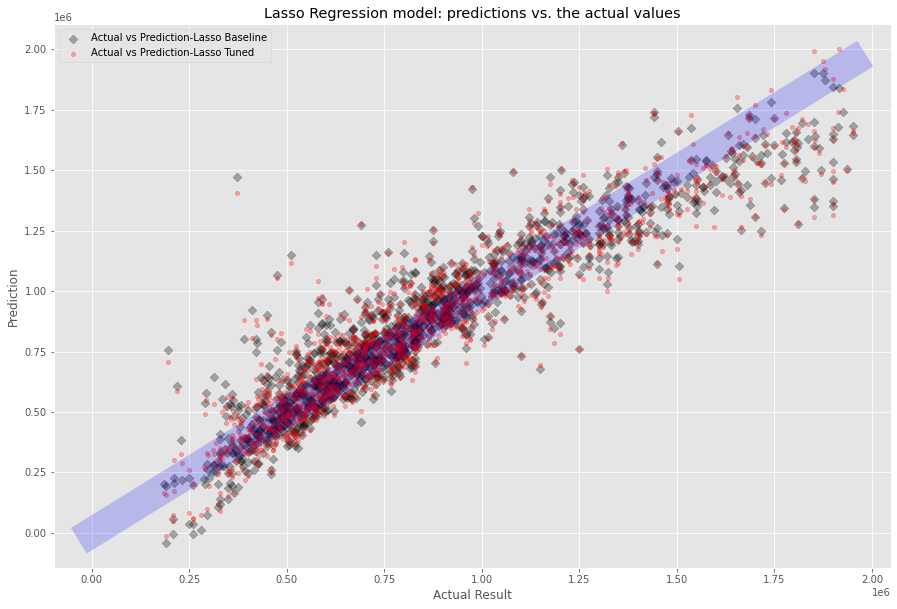

In [36]:
# Let's plot the predictions against the actual result. Use scatter()
plt.figure(figsize=(15,10))

# Since Regularization didn't improve we'll use model after we dropped the less important features:y_pred_lasso_2
plt.scatter(y_test,y_pred_lasso, color='black', marker='D', s=40, alpha=0.3, label='Actual vs Prediction-Lasso Baseline')
plt.scatter(y_test,y_pred_lasso_a, color='red', marker='o', s=20, alpha=0.3,label='Actual vs Prediction-Lasso Tuned')
plt.title('Lasso Regression model: predictions vs. the actual values')

# Add a line for perfect correlation
plt.plot([0,(np.max(y_test))],[0,(np.max(y_test))], 'blue', linewidth=30, alpha=0.2)
plt.legend()
plt.xlabel('Actual Result')
plt.ylabel('Prediction')

In [37]:
final_lasso = pd.DataFrame({'SalePrice_Actual': y_test, 'SalePrice_Predicted': y_pred_lasso_a.round(3)})
final_lasso.head(10).sort_values(by='SalePrice_Actual', ascending=False)

,SalePrice_Actual,SalePrice_Predicted
437,1767539,1478996.613
253,1600000,1502517.869
1804,1320000,1001908.210
4358,1170000,978621.526
2734,890000,1069134.125
4592,763000,820572.955
3924,699000,755958.177
1597,692000,593317.649
3836,635000,640216.125
841,572000,631929.924


## 10. Models next step:<a id='10_Models_next_step'></a>

Now, after building our 4th Model: Lasso Regression, let's see if we can further improve our prediction using below algorithm:

 * Decision Trees Regression
 

## 9. Saving our Data<a id='9_Saving_our_data'></a>
Finally, let's save our final DataFrame with the new features:


In [ ]:
# Saving df_final_v1:
df_final_v1.to_csv(path_or_buf = "path" + "/pre_processing_df.csv", index=False)

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))